Reading a univariate data first


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\assignmnet1\Group09\Group09\Regression\UnivariateData\9.csv")
data = data.sample(frac=1).reset_index(drop=True) # shuffle
data.head()


,0.192,0.022934
0,0.133,0.007340
1,0.801,2.890400
2,0.261,0.249900
3,0.987,8.962800
4,0.295,0.078042


In [4]:
# vizualising the data

data.columns = ['Feature', 'Target'] 
data

,Feature,Target
0,0.133,0.007340
1,0.801,2.890400
2,0.261,0.249900
3,0.987,8.962800
4,0.295,0.078042
...,...,...
995,0.236,0.061861
996,0.842,3.626000
997,0.219,0.035393
998,0.891,4.931800


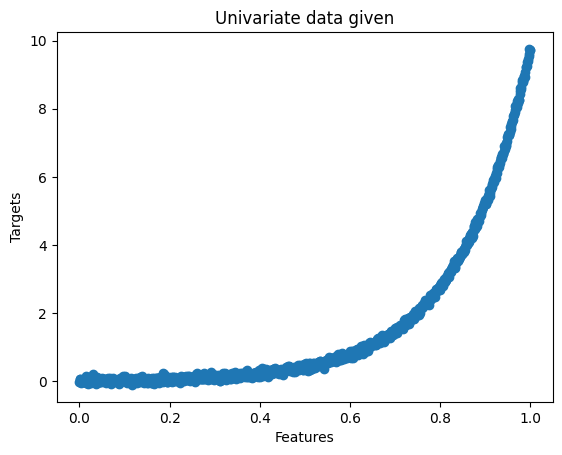

In [5]:
plt.scatter(data["Feature"]  , data['Target'])
plt.title("Univariate data given")
plt.xlabel("Features")
plt.ylabel("Targets")
plt.show()

In [21]:
# initialize random weights

weights = np.random.randn(2) * 0.001 # two weights , one for feature and one for bias
weights

array([0.00072195, 0.001402  ])

In [18]:
# split into training and testing


f_train = data[0: int ( (data.shape[0] * 0.7) )] # 70 % training and 30 % testing
f_test = data[len(f_train):]

print(f"f_train is having shape { f_train.shape}")
print(f"f_test is having shape { f_test.shape}")

f_train is having shape (700, 2)
f_test is having shape (300, 2)


In [19]:
f_train = np.array(f_train) # converting into numpy arrays for my comfrotability
f_test =  np.array(f_test)

f_train_with_bias = np.insert(f_train ,1,1,axis = 1)
f_test_with_bias = np.insert(f_test ,1,1,axis = 1)

# f_test_with_bias

In [22]:
Epoches = 10
epoch_loss = []
eta = 1e-3
for Epoch in range(Epoches):
    avg_error = []
    
    for i in f_train_with_bias:
        
        a = np.dot(weights.T , i[0:2])
        f_a = a # representing linear activation functio
        E = (i[1] - f_a) ** 2  # we are following SGD , so we will update weights  after every error 
        avg_error.append(E)
        weights = weights - eta * (2 * (i[2] - f_a) * i[0:2])
        
        
    epoch_avg_error = np.mean(avg_error)
    print(f"Epoch no is {Epoch} | avg error is {round(epoch_avg_error , 4)} | weights are {weights}")




    


Epoch no is 0 | avg error is 25.7425 | weights are [-4.44199603 -6.91572567]
Epoch no is 1 | avg error is 1135.5215 | weights are [-28.09648706 -49.43171671]
Epoch no is 2 | avg error is 41473.17 | weights are [-165.50169277 -303.35373399]
Epoch no is 3 | avg error is 1469569.8993 | weights are [ -977.67996631 -1812.03523961]
Epoch no is 4 | avg error is 51810089.6144 | weights are [ -5794.02903074 -10767.34412278]
Epoch no is 5 | avg error is 1825021071.6951 | weights are [-34373.05764679 -63915.36217613]
Epoch no is 6 | avg error is 64277488392.9851 | weights are [-203972.95931015 -379328.25349592]
Epoch no is 7 | avg error is 2263806806674.4966 | weights are [-1210470.49902624 -2251170.27179522]
Epoch no is 8 | avg error is 79729316841827.17 | weights are [ -7183594.08700894 -13359748.07830714]
Epoch no is 9 | avg error is 2807995604306765.0 | weights are [-42631500.53502215 -79284369.01698203]


weights are exploding , so trying to normalize input , but not the target .

In [23]:
mu = np.mean(f_train[:,0])
mu
sigma = np.std(f_train[:,0])
print(f"mean is {round(mu,5)} and std deviation is {round(sigma,5)}")



mean is 0.50561 and std deviation is 0.29041


In [29]:
new_array_x = []
new_array_y = []

for i in f_train:
    z = (i[0] - mu) / sigma
    y = i[1]
    
    new_array_x.append(z)
    new_array_y.append(y)    

df_x = pd.DataFrame(new_array_x)
df_y = pd.DataFrame(new_array_y)

In [30]:
df_new = pd.concat([df_x,df_y],axis = 1)
df_new.columns = ["feature" , "target"]
df_new



,feature,target
0,-1.283052,0.007340
1,1.017142,2.890400
2,-0.842296,0.249900
3,1.657616,8.962800
4,-0.725220,0.078042
...,...,...
695,-1.296826,0.019779
696,-0.883617,0.115040
697,-1.186637,0.102660
698,-1.365694,0.031871


In [32]:
data_normalized_with_bias = np.insert(df_new , 1,1,axis = 1)
data_normalized_with_bias

array([[-1.28305204,  1.        ,  0.0073396 ],
       [ 1.01714247,  1.        ,  2.8904    ],
       [-0.8422962 ,  1.        ,  0.2499    ],
       ...,
       [-1.1866367 ,  1.        ,  0.10266   ],
       [-1.36569376,  1.        ,  0.031871  ],
       [-0.42908761,  1.        ,  0.16008   ]], shape=(700, 3))

In [35]:
weights = np.random.randn(2) * 0.001 # one extra weight as bias


Epoches = 16
epoch_loss = []
eta = 1e-5

for Epoch in range(Epoches):

    avg_error = []
    
    for i in data_normalized_with_bias:
        
        a = np.dot(weights.T , i[0:2])
        f_a = a # representing linear activation functio
        E = (i[2] - f_a) ** 2  # we are following SGD , so we will update weights  after every error 
        avg_error.append(E)
        weights = weights - eta * (2 * (i[2] - f_a) * i[0:2])
        
        
    epoch_avg_error = np.mean(avg_error)
    epoch_loss.append(epoch_avg_error)
    print(f"Epoch no is {Epoch} | avg error is {round(epoch_avg_error , 4)} | weights are {weights}")




    


Epoch no is 0 | avg error is 8.1991 | weights are [-0.02541461 -0.02467298]
Epoch no is 1 | avg error is 8.3784 | weights are [-0.05256442 -0.04782146]
Epoch no is 2 | avg error is 8.5627 | weights are [-0.08009698 -0.07129629]
Epoch no is 3 | avg error is 8.7524 | weights are [-0.1080177  -0.09510208]
Epoch no is 4 | avg error is 8.9474 | weights are [-0.13633204 -0.11924349]
Epoch no is 5 | avg error is 9.1479 | weights are [-0.16504556 -0.14372525]
Epoch no is 6 | avg error is 9.3542 | weights are [-0.19416388 -0.16855216]
Epoch no is 7 | avg error is 9.5663 | weights are [-0.22369271 -0.19372909]
Epoch no is 8 | avg error is 9.7844 | weights are [-0.25363784 -0.21926097]
Epoch no is 9 | avg error is 10.0087 | weights are [-0.28400513 -0.2451528 ]
Epoch no is 10 | avg error is 10.2394 | weights are [-0.31480054 -0.27140967]
Epoch no is 11 | avg error is 10.4767 | weights are [-0.34603011 -0.29803671]
Epoch no is 12 | avg error is 10.7207 | weights are [-0.37769995 -0.32503915]
Epoch

even after , normalizingg features ,reducing learning rate  ,  the weights are exploding , also now i am trying to normalize targets as well


In [36]:
mu_target = np.mean(f_train[:,1])
sigma_target = np.std(f_train[:,1])
print(f"mean is {round(mu_target,5)} and std deviation is {round(sigma_target,5)}")


mean is 1.61695 and std deviation is 2.34441


In [38]:
new_array_x = []
new_array_y = []

for i in f_train:
    z = (i[0] - mu) / sigma
    y = (i[1] - mu_target) / sigma_target
    
    new_array_x.append(z)
    new_array_y.append(y)    

df_x = pd.DataFrame(new_array_x)
df_y = pd.DataFrame(new_array_y)

In [39]:

df_new = pd.concat([df_x,df_y],axis = 1)
df_new.columns = ["feature" , "target"]
df_new_both_normalized = df_new
df_new_both_normalized


,feature,target
0,-1.283052,-0.686573
1,1.017142,0.543188
2,-0.842296,-0.583109
3,1.657616,3.133353
4,-0.725220,-0.656415
...,...,...
695,-1.296826,-0.681267
696,-0.883617,-0.640633
697,-1.186637,-0.645914
698,-1.365694,-0.676109


In [40]:
data_all_normalized_with_bias = np.insert(df_new_both_normalized ,1,1,axis=1)
data_all_normalized_with_bias

array([[-1.28305204,  1.        , -0.68657275],
       [ 1.01714247,  1.        ,  0.54318818],
       [-0.8422962 ,  1.        , -0.58310933],
       ...,
       [-1.1866367 ,  1.        , -0.64591412],
       [-1.36569376,  1.        , -0.67610896],
       [-0.42908761,  1.        , -0.62142178]], shape=(700, 3))

In [ ]:
weights = np.random.randn(2) * 0.0001 # one extra weight as bias

Epoches = 16
epoch_loss = []
eta = 1e-5

for Epoch in range(Epoches):

    avg_error = []
    
    for i in data_all_normalized_with_bias:
        
        a = np.dot(weights.T , i[0:2])
        f_a = a # representing linear activation functio
        E = (i[2] - f_a) ** 2  # we are following SGD , so we will update weights  after every error 
        avg_error.append(E)
        weights = weights - eta * (2 * (i[2] - f_a) * i[0:2])
        
        
    epoch_avg_error = np.mean(avg_error)
    epoch_loss.append(epoch_avg_error)
    print(f"Epoch no is {Epoch} | avg error is {round(epoch_avg_error , 4)} | weights are {weights}")




    
# still weights are exploding , i need to figure out something else.


Epoch no is 0 | avg error is 1.0093 | weights are [-1.14536801e-02  2.83390391e-06]
Epoch no is 1 | avg error is 1.0282 | weights are [-2.30430555e-02  8.89952538e-07]
Epoch no is 2 | avg error is 1.0476 | weights are [-3.47958187e-02 -1.08248382e-06]
Epoch no is 3 | avg error is 1.0676 | weights are [-4.67142730e-02 -3.08382197e-06]
Epoch no is 4 | avg error is 1.0882 | weights are [-5.88007545e-02 -5.11448479e-06]
Epoch no is 5 | avg error is 1.1094 | weights are [-7.10576320e-02 -7.17490134e-06]
Epoch no is 6 | avg error is 1.1312 | weights are [-8.34873076e-02 -9.26550696e-06]
Epoch no is 7 | avg error is 1.1535 | weights are [-9.60922177e-02 -1.13867433e-05]
Epoch no is 8 | avg error is 1.1765 | weights are [-1.08874832e-01 -1.35390587e-05]
Epoch no is 9 | avg error is 1.2002 | weights are [-1.21837657e-01 -1.57229076e-05]
Epoch no is 10 | avg error is 1.2246 | weights are [-1.34983233e-01 -1.79387515e-05]
Epoch no is 11 | avg error is 1.2496 | weights are [-1.48314136e-01 -2.0187